In [11]:
#Example queries

# maximum amount of delays ordered by month

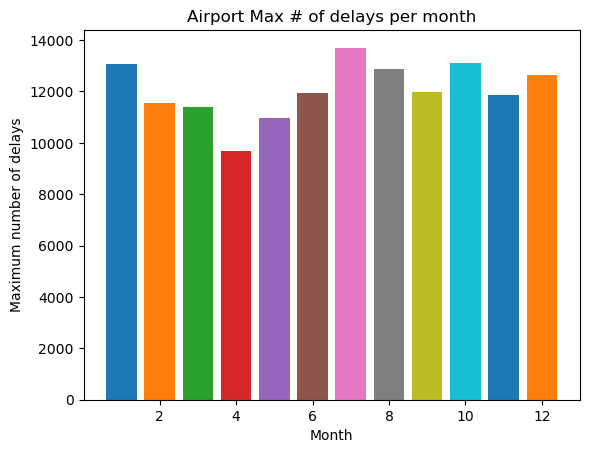

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from importlib import reload

PREDICTION_FILE = 'area_predictions.csv'

FILEPATH = "https://corgis-edu.github.io/corgis/datasets/csv/airlines/airlines.csv"

df = pd.read_csv(FILEPATH)

rows, columns = df.shape

new_column = (
    df["Statistics.# of Delays.National Aviation System"]
    .add(df["Statistics.# of Delays.Carrier"])
    .add(df["Statistics.# of Delays.Late Aircraft"])
    .add(df["Statistics.# of Delays.Security"])
    .add(df["Statistics.# of Delays.Weather"])
)

maxes = []

df.insert(columns, "SumDelays", new_column, True)

df["Time.Label"] = pd.to_datetime(df["Time.Label"])

for i in range(1, 13):
    filtered_months = df[['Airport.Code', 'Airport.Name', 'Time.Label', 'SumDelays']][df['Time.Label'].dt.month == i]
    max_delays = filtered_months['SumDelays'].max()
    plt.bar(i, max_delays)
    maxes.append(max_delays)

vertical_ticks = np.linspace(0, np.average(maxes), 25).tolist().extend([max(maxes)])

plt.ylabel("Maximum number of delays")
plt.xlabel("Month")
plt.yticks(vertical_ticks)
plt.title("Airport Max # of delays per month")

plt.show()

In [3]:
df = pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


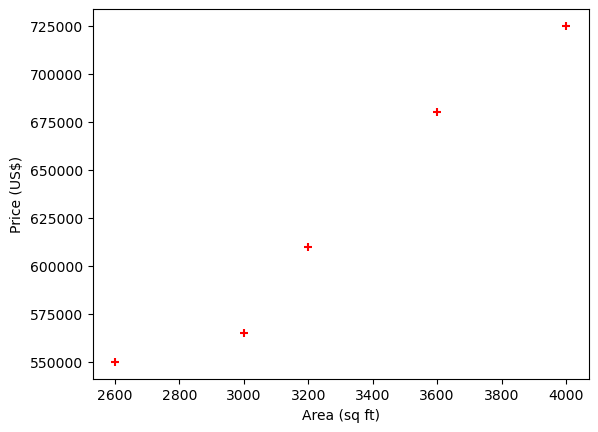

In [33]:
from importlib import reload

plt = reload(plt)
plt.xlabel("Area (sq ft)")
plt.ylabel("Price (US$)")
plt.scatter(df.area, df.price, color='red', marker='+')

In [36]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df[['price']])



LinearRegression()

In [46]:
reg.predict([[5000]])


c:\Users\flyin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[859554.79452055]])

In [42]:
reg.coef_

array([[135.78767123]])

In [43]:
reg.intercept_

array([180616.43835616])

In [49]:
y=reg.coef_*5000+reg.intercept_
y

array([[859554.79452055]])

In [51]:
df = pd.DataFrame({ 'area': [1000, 1500, 2300, 3540, 4120, 4560, 5490, 3460, 4750, 2300, 9000, 8600, 7100]})
df.to_csv('areas.csv', index=False)

In [53]:
d = pd.read_csv(PREDICTION_FILE)
d.head(3)

,area
0,1000
1,1500
2,2300


In [55]:
p = reg.predict(d)

In [61]:
d['prices'] = p
d
d.to_csv(PREDICTION_FILE, index=False)

In [ ]:
%matplotlib inline
plt.scatter()